In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-06-29 18:02:35.104314: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 18:02:35.154079: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 18:02:35.155063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 18:02:35.884060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
sst_data = np.random.rand(5000, 64, 64, 1)
labels = np.where(sst_data < 0.3, 1, 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(sst_data, labels, test_size=0.2, random_state=42)

In [6]:
inputs = keras.layers.Input((64, 64, 1))
conv1 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
conv1 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
conv2 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)

up1 = keras.layers.concatenate([keras.layers.UpSampling2D(size=(2, 2))(conv2), conv1], axis=-1)
conv3 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
conv3 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)

out = keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(conv3)

model = keras.models.Model(inputs=[inputs], outputs=[out])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

predictions = model.predict(X_test)

Epoch 1/10
125/125 [==============================] - 133s 1s/step - loss: 0.2112 - accuracy: 0.8979 - val_loss: 0.0370 - val_accuracy: 0.9875
Epoch 2/10
125/125 [==============================] - 133s 1s/step - loss: 0.0337 - accuracy: 0.9869 - val_loss: 0.0244 - val_accuracy: 0.9917
Epoch 3/10
125/125 [==============================] - 133s 1s/step - loss: 0.0238 - accuracy: 0.9909 - val_loss: 0.0277 - val_accuracy: 0.9863
Epoch 4/10
125/125 [==============================] - 133s 1s/step - loss: 0.0205 - accuracy: 0.9920 - val_loss: 0.0254 - val_accuracy: 0.9872
Epoch 5/10
125/125 [==============================] - 132s 1s/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0134 - val_accuracy: 0.9959
Epoch 6/10
125/125 [==============================] - 132s 1s/step - loss: 0.0169 - accuracy: 0.9936 - val_loss: 0.0201 - val_accuracy: 0.9905
Epoch 7/10
125/125 [==============================] - 132s 1s/step - loss: 0.0135 - accuracy: 0.9951 - val_loss: 0.0104 - val_accuracy: 0.9973

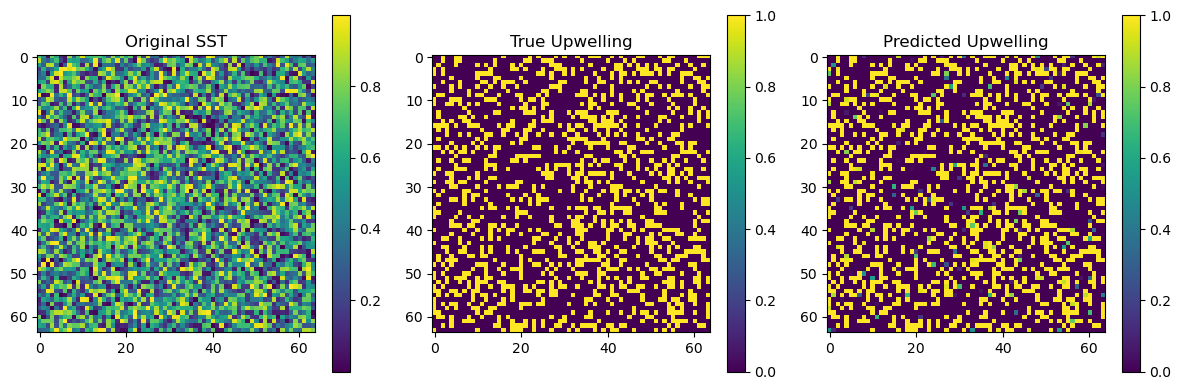

In [8]:
import matplotlib.pyplot as plt

# 选择一个测试样本进行可视化
test_index = 0

# 可视化原始sst数据
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_test[test_index].squeeze(), cmap='viridis')
plt.title("Original SST")
plt.colorbar()

# 可视化标签（即真实的upwelling区域）
plt.subplot(1, 3, 2)
plt.imshow(y_test[test_index].squeeze(), cmap='viridis')
plt.title("True Upwelling")
plt.colorbar()

# 可视化模型预测的upwelling区域
plt.subplot(1, 3, 3)
plt.imshow(predictions[test_index].squeeze(), cmap='viridis')
plt.title("Predicted Upwelling")
plt.colorbar()

plt.tight_layout()
plt.show()
